In [10]:
pip install -q opencv-python numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns

In [3]:
hist_size = 256  # bins for intensity values [0,255]
hist_r = np.zeros(hist_size)
hist_g = np.zeros(hist_size)
hist_b = np.zeros(hist_size)


In [9]:
folder_path = "/exchange/cvai/colorAIzer/data/coco2017"
for filename in tqdm(os.listdir(folder_path)):
    if filename.lower().endswith(".jpg") or filename.lower().endswith(".jpeg"):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)

        if image is None:
            continue

        # Split the image into B, G, R channels
        b, g, r = cv2.split(image)

        # Calculate histograms and accumulate
        hist_b += cv2.calcHist([b], [0], None, [hist_size], [0, 256]).flatten()
        hist_g += cv2.calcHist([g], [0], None, [hist_size], [0, 256]).flatten()
        hist_r += cv2.calcHist([r], [0], None, [hist_size], [0, 256]).flatten()


100%|██████████| 118291/118291 [06:17<00:00, 313.48it/s]


In [20]:
# Convert histogram data into a tidy DataFrame
df_hist = pd.DataFrame({
    'Intensity': np.tile(np.arange(256), 3),
    'Frequency': np.concatenate([hist_r, hist_g, hist_b]),
    'Channel': ['Red'] * 256 + ['Green'] * 256 + ['Blue'] * 256
})

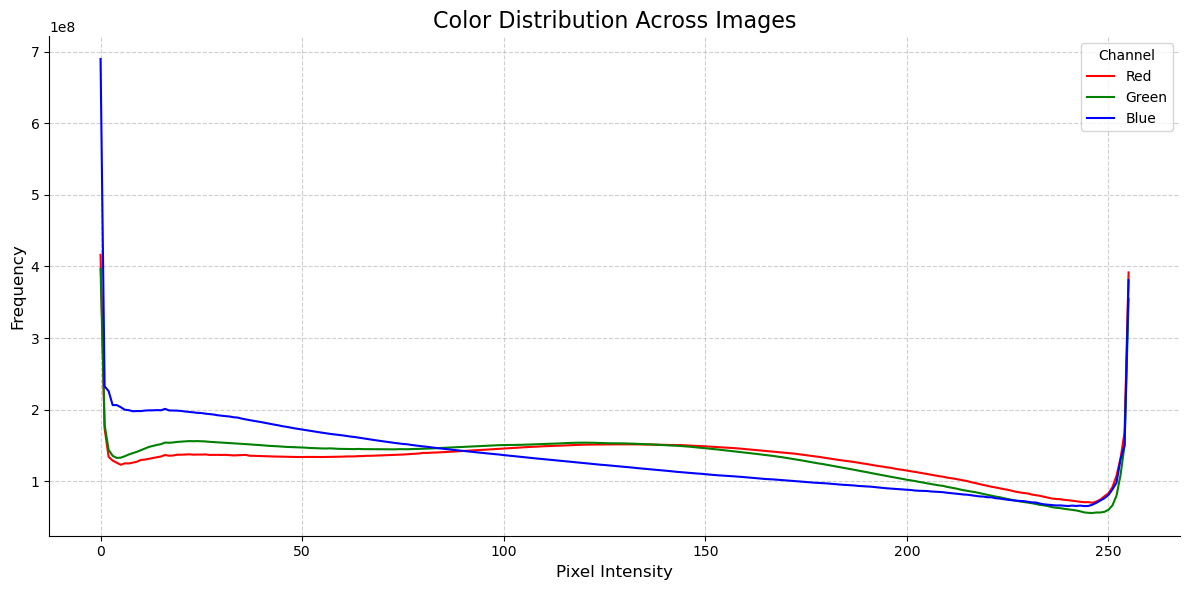

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hist, x='Intensity', y='Frequency', hue='Channel', palette=['r', 'g', 'b'])
plt.title('Color Distribution Across Images', fontsize=16)
plt.xlabel('Pixel Intensity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
plt.show()

In [23]:
df_hist = pd.DataFrame({
    'Intensity': np.tile(np.arange(256), 3),
    'Frequency': np.concatenate([hist_r, hist_g, hist_b]),
    'Channel': ['Red'] * 256 + ['Green'] * 256 + ['Blue'] * 256
})

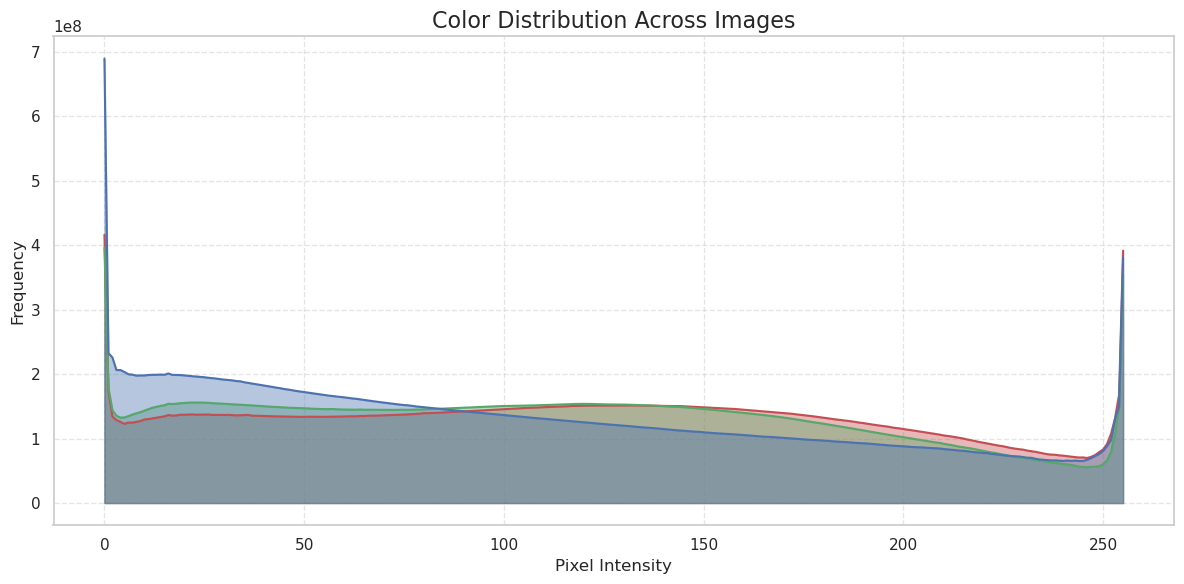

In [31]:
# Apply Seaborn theme
sns.set_theme(style="whitegrid")

intensity = np.arange(256)

plt.figure(figsize=(12, 6))

plt.fill_between(intensity, hist_r, color='r', alpha=0.4, label='Red')
plt.fill_between(intensity, hist_g, color='g', alpha=0.4, label='Green')
plt.fill_between(intensity, hist_b, color='b', alpha=0.4, label='Blue')
sns.lineplot(data=df_hist, x='Intensity', y='Frequency', hue='Channel', palette=['r', 'g', 'b'])

plt.title('Color Distribution Across Images', fontsize=16)
plt.xlabel('Pixel Intensity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend().set_visible(False)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [13]:
mean_r = np.sum(hist_r * np.arange(256)) / np.sum(hist_r)
mean_g = np.sum(hist_g * np.arange(256)) / np.sum(hist_g)
mean_b = np.sum(hist_b * np.arange(256)) / np.sum(hist_b)

print(f"Mean R: {mean_r:.2f}, G: {mean_g:.2f}, B: {mean_b:.2f}")


Mean R: 119.91, G: 113.88, B: 103.84
